# Residence Time Distribution - Exercises

## Exercise 1: Step function in CSTR

Analyze how the concentration profile of a `CSTR` reacts to a step function:

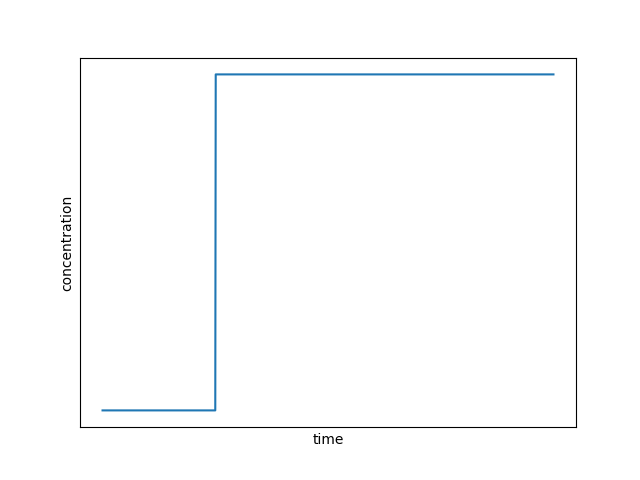

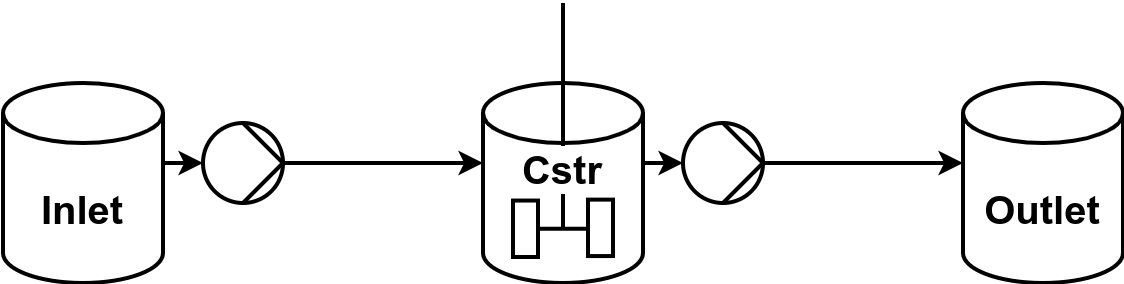



***Hint:*** Always check the input arguments of our model template functions.

In [1]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(1)

tau = 60
V = 1e-3
Q = V/tau

# Unit Operations
from CADETProcess.processModel import Inlet, Cstr, Outlet

## Inlet
# We assume constant flow and constant inlet concentrations.
inlet = Inlet(component_system, 'inlet')
inlet.c = [1]
inlet.flow_rate = Q

cstr = Cstr(component_system, 'cstr')
cstr.c = [0]
cstr.V = V
cstr.flow_rate = Q

outlet = Outlet(component_system, 'outlet')

# Flow Sheet
from CADETProcess.processModel import FlowSheet

flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(inlet)
flow_sheet.add_unit(cstr)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet, cstr)
flow_sheet.add_connection(cstr, outlet)

In [2]:
from CADETProcess.processModel import Process
process = Process(flow_sheet, 'rtd_cstr')
process.cycle_time = 10 * tau

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='$time~/~min$', ylabel='$c~/~mM$'>)

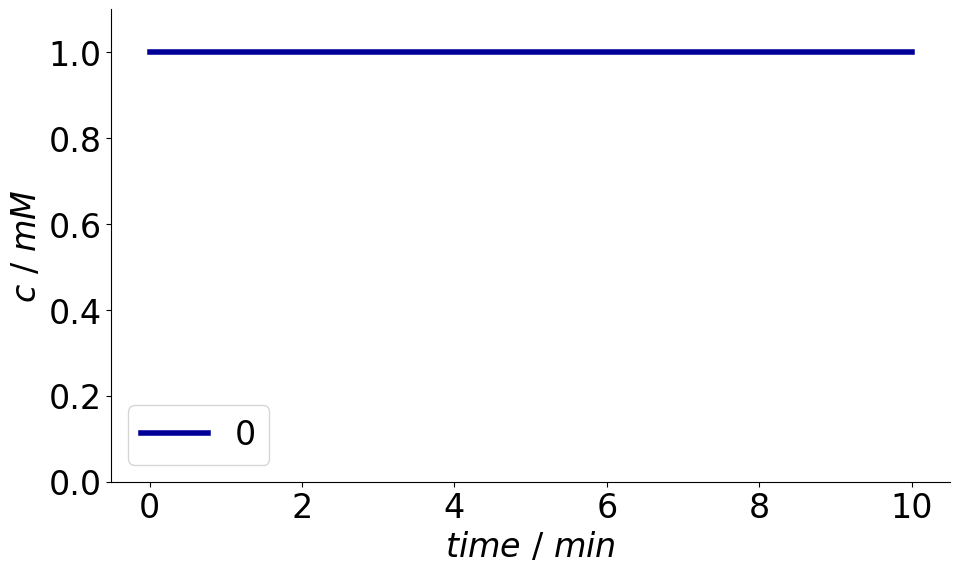

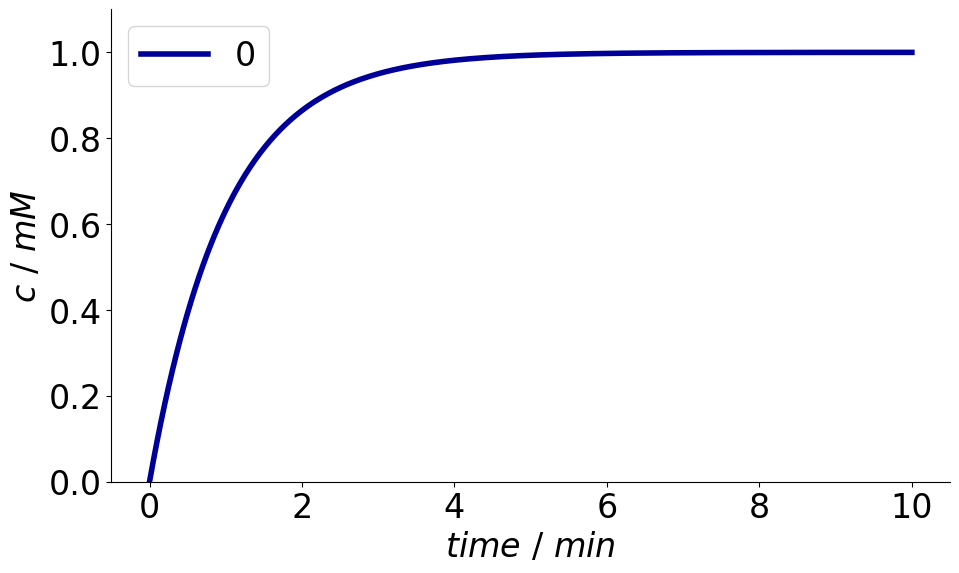

In [3]:
from CADETProcess.simulator import Cadet

simulator = Cadet()

simulation_results = simulator.simulate(process)
simulation_results.solution.cstr.inlet.plot()
simulation_results.solution.cstr.outlet.plot()

## Exercise 2: Step function in Tubular reactor

**Task:** Also analyze the system behaviour of a Tubular reactor for different input profiles (see Exercise 1).

In [4]:
from CADETProcess.processModel import ComponentSystem

component_system = ComponentSystem(1)

tau = 60
V = 1e-3
Q = V/tau

# Unit Operations
from CADETProcess.processModel import Inlet, TubularReactor, Outlet

## Inlet
# We assume constant flow and constant inlet concentrations.
inlet = Inlet(component_system, 'inlet')
inlet.c = [1]
inlet.flow_rate = Q

pfr = TubularReactor(component_system, 'pfr')
pfr.length = 1
pfr.diameter = 0.1
pfr.axial_dispersion = 0

outlet = Outlet(component_system, 'outlet')

# Flow Sheet
from CADETProcess.processModel import FlowSheet

flow_sheet = FlowSheet(component_system)

flow_sheet.add_unit(inlet)
flow_sheet.add_unit(pfr)
flow_sheet.add_unit(outlet)

flow_sheet.add_connection(inlet, pfr)
flow_sheet.add_connection(pfr, outlet)

In [5]:
from CADETProcess.processModel import Process
process = Process(flow_sheet, 'rtd_pfr')
process.cycle_time = 10 * tau

(<Figure size 1000x600 with 1 Axes>,
 <Axes: xlabel='$time~/~min$', ylabel='$c~/~mM$'>)

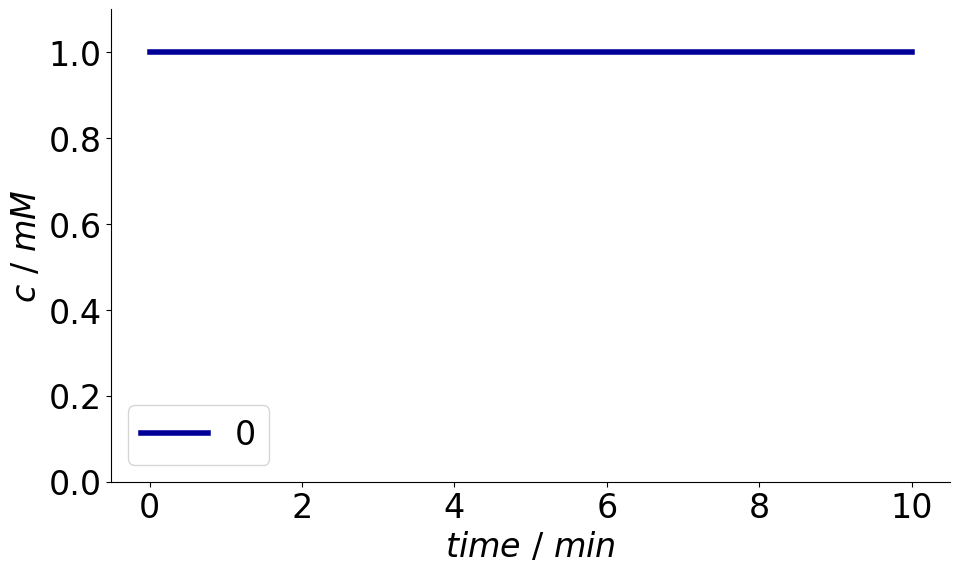

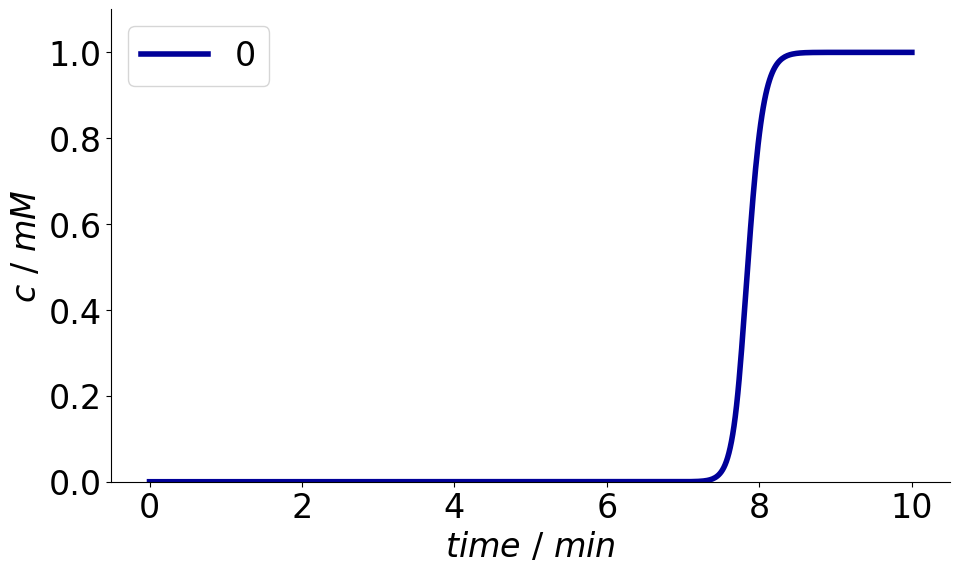

In [6]:
from CADETProcess.simulator import Cadet

simulator = Cadet()

simulation_results = simulator.simulate(process)
simulation_results.solution.pfr.inlet.plot()
simulation_results.solution.pfr.outlet.plot()

## Bonus Exercise
Many systems can be modelled by a chain of unit operations.

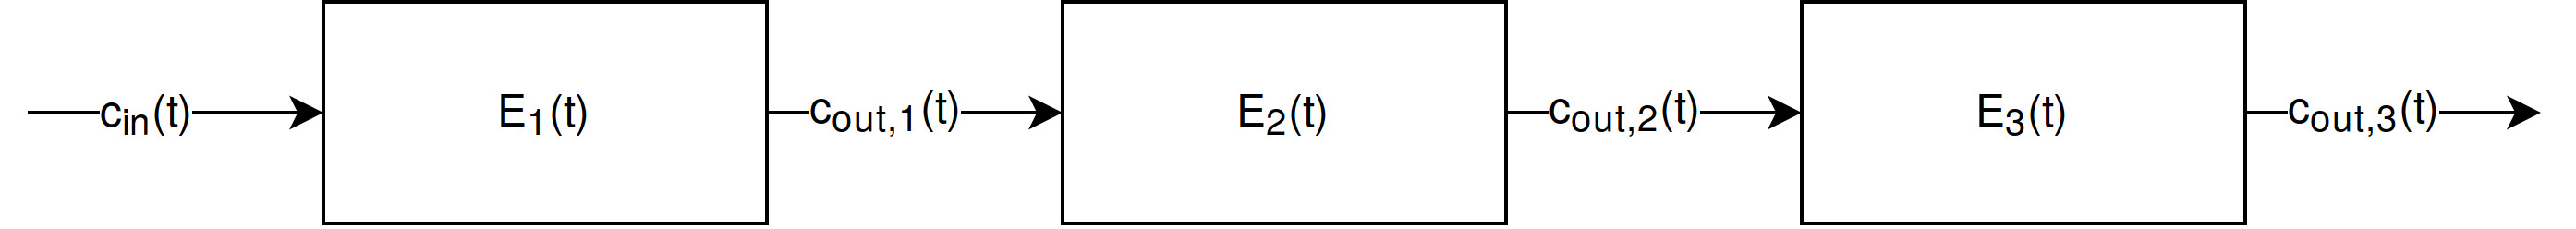

Try connecting combining both the CSTR with a Tubular reactor and analyze the behavior.